In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns  
import matplotlib.pyplot as plt

# might be needed depending on your version of Jupyter
%matplotlib inline

In [4]:
df = pd.read_csv('../Oil & Gas Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdT.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   START_DATE  528 non-null    object
 1   OIL         528 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


In [6]:
df.isnull().sum()

START_DATE    0
OIL           0
dtype: int64

In [7]:
df.head()

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857


In [8]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [9]:
df.corr()['OIL'].sort_values()

OIL    1.0
Name: OIL, dtype: float64

In [10]:
#df.corr()['GAS'].sort_values()

In [11]:
#df.corr()['WATER'].sort_values()

In [12]:
df.corr()

,OIL
OIL,1.0


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OIL,528.0,8.045604e+06,1.848717e+06,2448443.0,6849751.0,8160325.0,8837232.25,13429157.0


In [14]:
from datetime import datetime
import statsmodels.api as sm

In [15]:
df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [16]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [17]:
df['START_DATE']=df['START_DATE'].apply(pd.to_datetime)

In [18]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [19]:
df.set_index('START_DATE',inplace=True)

In [21]:
#df = df.drop('WATER',axis=1)

In [22]:
#df = df.drop('UWI',axis=1)

In [23]:
#df = df.drop('GAS',axis=1)

In [24]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [25]:
#df=df.replace(0, np.nan)

In [26]:
#df=df.replace(0, np.nan).dropna(subset=["OIL"], how="all")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 528 entries, 1974-01-01 to 2017-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   OIL     528 non-null    int64
dtypes: int64(1)
memory usage: 8.2 KB


In [77]:
result=sm.tsa.filters.hpfilter(df['OIL'])
result

(START_DATE
 1974-01-01   -3.325137e+06
 1974-01-02   -9.006317e+05
 1974-01-03    1.867500e+06
 1974-01-04    2.794902e+06
 1974-01-05    1.925499e+06
                   ...     
 2017-01-08    9.830939e+02
 2017-01-09   -2.977209e+05
 2017-01-10    1.856082e+05
 2017-01-11   -4.778807e+04
 2017-01-12    8.988842e+04
 Name: OIL_cycle, Length: 528, dtype: float64,
 START_DATE
 1974-01-01    1.045950e+07
 1974-01-02    1.042893e+07
 1974-01-03    1.039629e+07
 1974-01-04    1.035892e+07
 1974-01-05    1.031536e+07
                   ...     
 2017-01-08    8.449780e+06
 2017-01-09    8.466438e+06
 2017-01-10    8.483321e+06
 2017-01-11    8.500286e+06
 2017-01-12    8.517308e+06
 Name: OIL_trend, Length: 528, dtype: float64)

In [78]:
result[0]

START_DATE
1974-01-01   -3.325137e+06
1974-01-02   -9.006317e+05
1974-01-03    1.867500e+06
1974-01-04    2.794902e+06
1974-01-05    1.925499e+06
                  ...     
2017-01-08    9.830939e+02
2017-01-09   -2.977209e+05
2017-01-10    1.856082e+05
2017-01-11   -4.778807e+04
2017-01-12    8.988842e+04
Name: OIL_cycle, Length: 528, dtype: float64

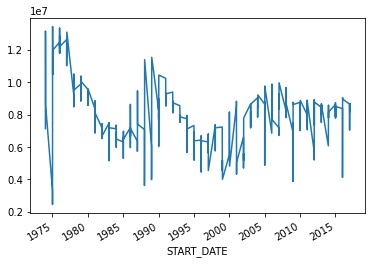

In [79]:
df['OIL'].plot();

In [80]:
OIL_REC, OIL_SIM=sm.tsa.filters.hpfilter(df['OIL'])

In [81]:
df['SIM']=OIL_SIM

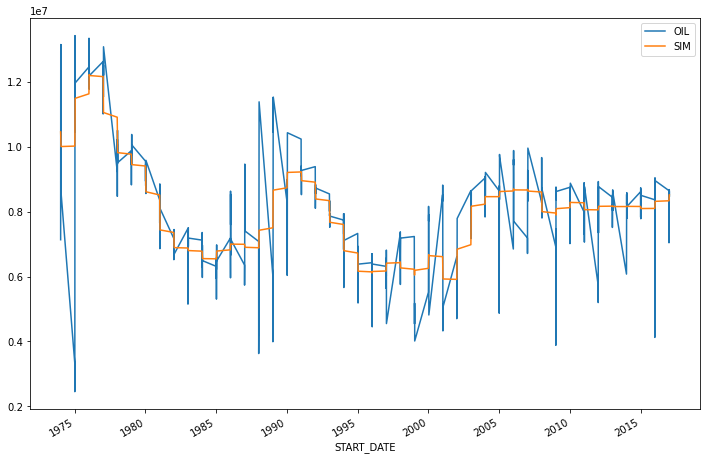

In [82]:
df[['OIL','SIM']].plot(figsize=(12,8));

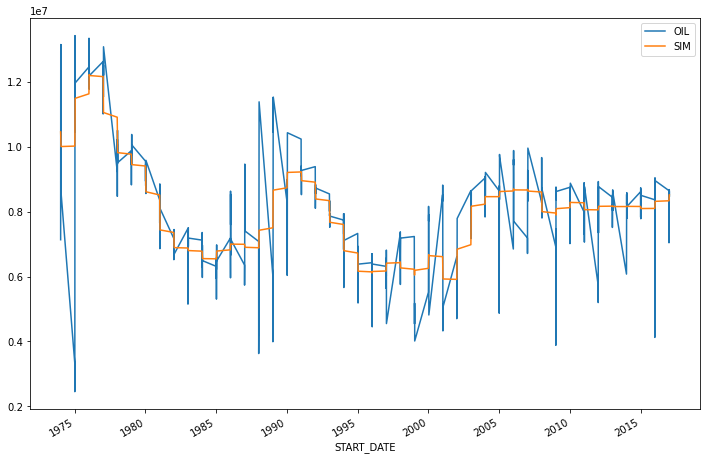

In [93]:
df[['OIL','SIM']]["1974-01-01":"2017-12-01"].plot(figsize=(12,8));

In [94]:
df['3-month-SMA']=df['OIL'].rolling(window=3).mean()
df['3-month-SMA']

START_DATE
1974-01-01             NaN
1974-01-02             NaN
1974-01-03    9.642152e+06
1974-01-04    1.164864e+07
1974-01-05    1.255282e+07
                  ...     
2017-01-08    8.381650e+06
2017-01-09    8.332054e+06
2017-01-10    8.429470e+06
2017-01-11    8.430048e+06
2017-01-12    8.576208e+06
Name: 3-month-SMA, Length: 528, dtype: float64

In [95]:
df['6-month-SMA']=df['OIL'].rolling(window=6).mean()
df['6-month-SMA']

START_DATE
1974-01-01             NaN
1974-01-02             NaN
1974-01-03             NaN
1974-01-04             NaN
1974-01-05             NaN
                  ...     
2017-01-08    8.429823e+06
2017-01-09    8.410904e+06
2017-01-10    8.443996e+06
2017-01-11    8.405849e+06
2017-01-12    8.454131e+06
Name: 6-month-SMA, Length: 528, dtype: float64

In [96]:
df['12-month-SMA']=df['OIL'].rolling(window=12).mean()
df['12-month-SMA']

START_DATE
1974-01-01             NaN
1974-01-02             NaN
1974-01-03             NaN
1974-01-04             NaN
1974-01-05             NaN
                  ...     
2017-01-08    8.399429e+06
2017-01-09    8.377002e+06
2017-01-10    8.380459e+06
2017-01-11    8.376150e+06
2017-01-12    8.347161e+06
Name: 12-month-SMA, Length: 528, dtype: float64

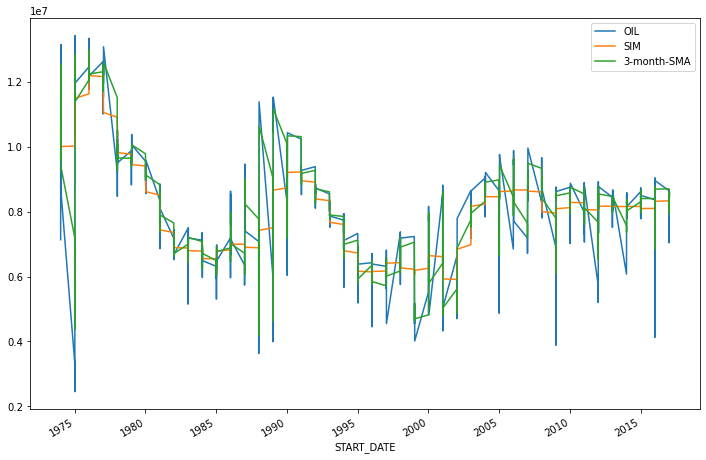

In [97]:
df[['OIL','SIM','3-month-SMA']]["1974-01-01":"2017-12-01"].plot(figsize=(12,8));

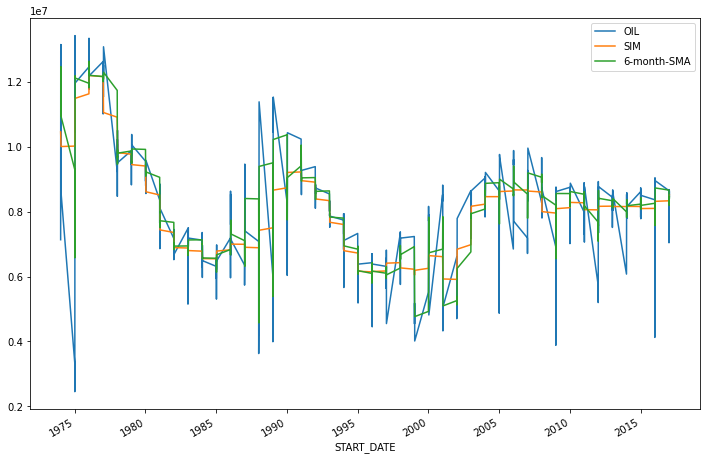

In [98]:
df[['OIL','SIM','6-month-SMA']]["1974-01-01":"2017-12-01"].plot(figsize=(12,8));

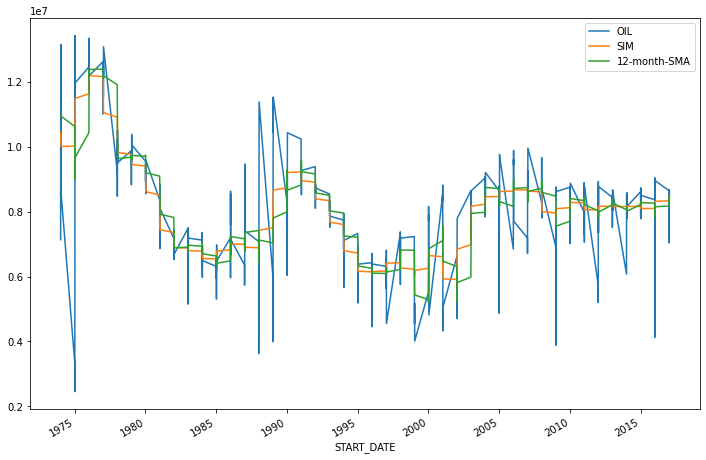

In [99]:
df[['OIL','SIM','12-month-SMA']]["1974-01-01":"2017-12-01"].plot(figsize=(12,8));

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [101]:
df

,OIL,SIM,3-month-SMA,6-month-SMA,12-month-SMA,First Difference,Second Difference,Seasonal Difference,forecast
START_DATE,,,,,,,,,
1974-01-01,7134368,1.045950e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974-01-02,9528303,1.042893e+07,NaN,NaN,NaN,2393935.0,NaN,NaN,NaN
1974-01-03,12263786,1.039629e+07,9.642152e+06,NaN,NaN,2735483.0,341548.0,NaN,NaN
1974-01-04,13153821,1.035892e+07,1.164864e+07,NaN,NaN,890035.0,-1845448.0,NaN,NaN
1974-01-05,12240857,1.031536e+07,1.255282e+07,NaN,NaN,-912964.0,-1802999.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2017-01-08,8450763,8.449780e+06,8.381650e+06,8.429823e+06,8.399429e+06,74081.0,14905.0,-365567.0,NaN
2017-01-09,8168717,8.466438e+06,8.332054e+06,8.410904e+06,8.377002e+06,-282046.0,-356127.0,-269120.0,NaN
2017-01-10,8668929,8.483321e+06,8.429470e+06,8.443996e+06,8.380459e+06,500212.0,782258.0,41477.0,NaN


In [102]:
#df = df.drop(['3-month-SMA','6-month-SMA','12-month-SMA'],axis=1)

In [103]:
#df

In [104]:
OilRate=df['OIL']
OilRate

START_DATE
1974-01-01     7134368
1974-01-02     9528303
1974-01-03    12263786
1974-01-04    13153821
1974-01-05    12240857
                ...   
2017-01-08     8450763
2017-01-09     8168717
2017-01-10     8668929
2017-01-11     8452498
2017-01-12     8607196
Name: OIL, Length: 528, dtype: int64

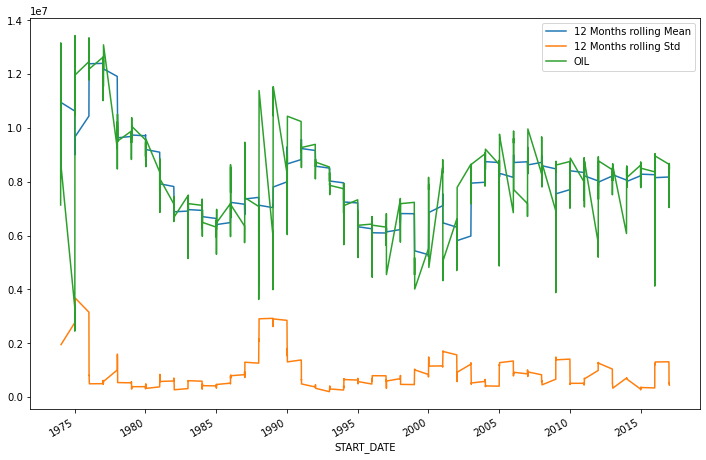

In [105]:
OilRate.rolling(12).mean().plot(label='12 Months rolling Mean')
OilRate.rolling(12).std().plot(label='12 Months rolling Std')
OilRate.plot(figsize=(12,8));
plt.legend();

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [107]:
#decomp=seasonal_decompose(OilRate)
#figx=OilRate.plot()
#figx.set_size_inches(8,8)

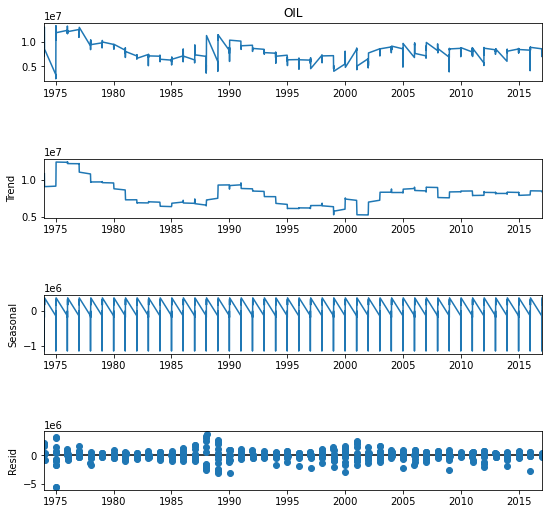

In [108]:
decomp=seasonal_decompose(OilRate,period=12)
figy=decomp.plot()
figy.set_size_inches(8,8)

<AxesSubplot:xlabel='START_DATE'>

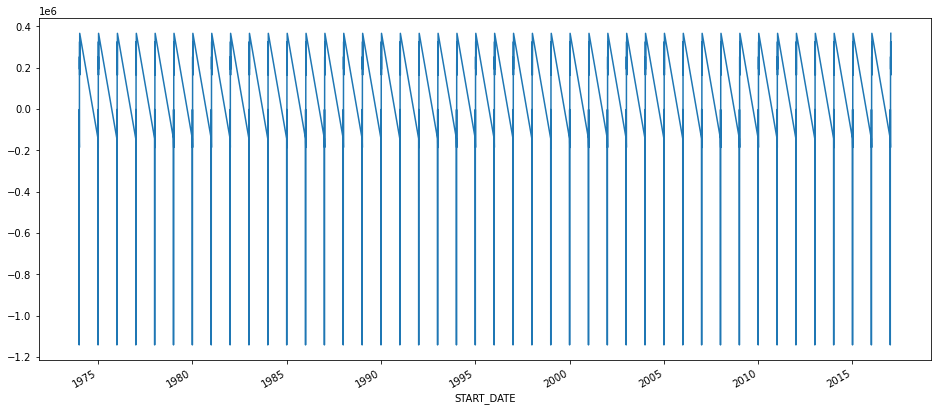

In [109]:
plt.figure(figsize = (16,7))
decomp.seasonal.plot()

In [110]:
from statsmodels.tsa.stattools import adfuller

In [111]:
result=adfuller(df['OIL'])

In [112]:
result

(-2.1460845706548715,
 0.2263918253803301,
 13,
 514,
 {'1%': -3.443136494643789,
  '5%': -2.8671794725841147,
  '10%': -2.5697736283668187},
 15361.749309598472)

In [113]:
def adf_check(time_series):
    result=adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels=['ADF Test Statistic','p-value','nbr of lags','Nbr of used Observations']
    
    for value,label in zip(result,labels):
        print(label+ ":"+str(value))
    
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root & is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root & is non-stationary')

In [114]:
adf_check(df['OIL'])

Augmented Dicky-Fuller Test
ADF Test Statistic:-2.1460845706548715
p-value:0.2263918253803301
nbr of lags:13
Nbr of used Observations:514
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root & is non-stationary


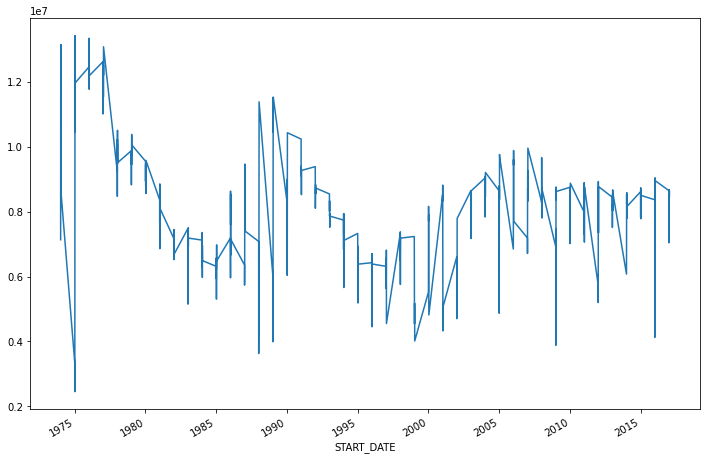

In [115]:
df['OIL']["1974-01-01":"2017-12-01"].plot(figsize=(12,8));

In [116]:
df['First Difference']=df['OIL']-df['OIL'].shift(1)
df['First Difference']

START_DATE
1974-01-01          NaN
1974-01-02    2393935.0
1974-01-03    2735483.0
1974-01-04     890035.0
1974-01-05    -912964.0
                ...    
2017-01-08      74081.0
2017-01-09    -282046.0
2017-01-10     500212.0
2017-01-11    -216431.0
2017-01-12     154698.0
Name: First Difference, Length: 528, dtype: float64

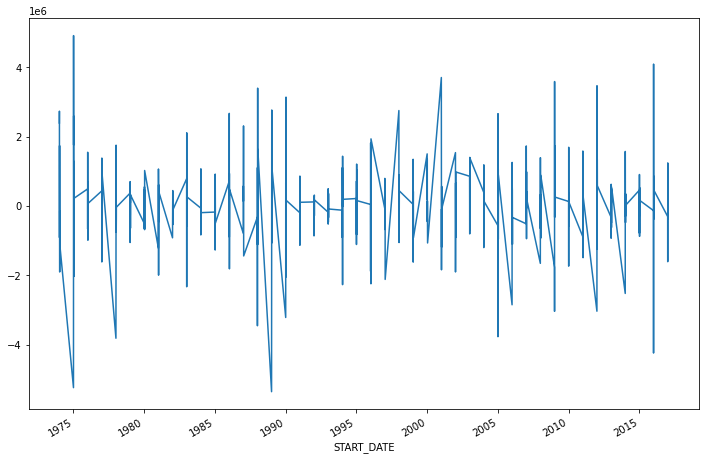

In [117]:
df['First Difference'][:"2020.12.31"].plot(figsize=(12,8));

In [118]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-9.482752562545254
p-value:3.833643380477443e-16
nbr of lags:12
Nbr of used Observations:514
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


In [119]:
df['Second Difference']=df['First Difference']-df['First Difference'].shift(1)

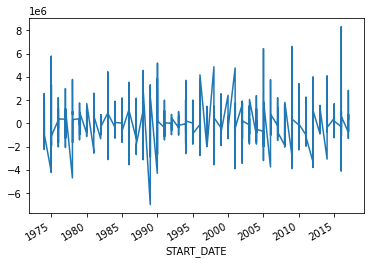

In [120]:
df['Second Difference'][:"2020.12.31"].plot();

In [121]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-11.556276457391629
p-value:3.3530305995304997e-21
nbr of lags:17
Nbr of used Observations:508
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


In [122]:
df['Seasonal Difference']=df['OIL']-df['OIL'].shift(12)

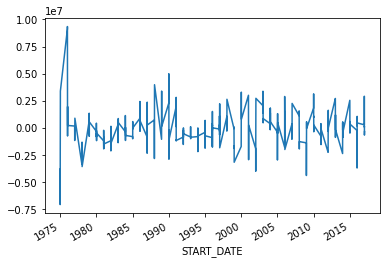

In [123]:
df['Seasonal Difference'][:"2020.12.31"].plot();

In [124]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-6.311760884437086
p-value:3.221726195462611e-08
nbr of lags:12
Nbr of used Observations:503
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


In [125]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [126]:
model=sm.tsa.statespace.SARIMAX(df['OIL'],order=(2,1,1),seasonal_order=(1,1,1,12))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [129]:
results=model.fit()

In [130]:
results

In [131]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                OIL   No. Observations:                  528
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7832.892
Date:                            Mon, 24 May 2021   AIC                          15677.784
Time:                                    02:39:10   BIC                          15703.249
Sample:                                         0   HQIC                         15687.764
                                            - 528                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6397      0.088      7.240      0.000       0.467       0.813
ar.L2          0.0724      0.080   

In [132]:
#model=ARIMA(ts_log, order=(2, 1, 0))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


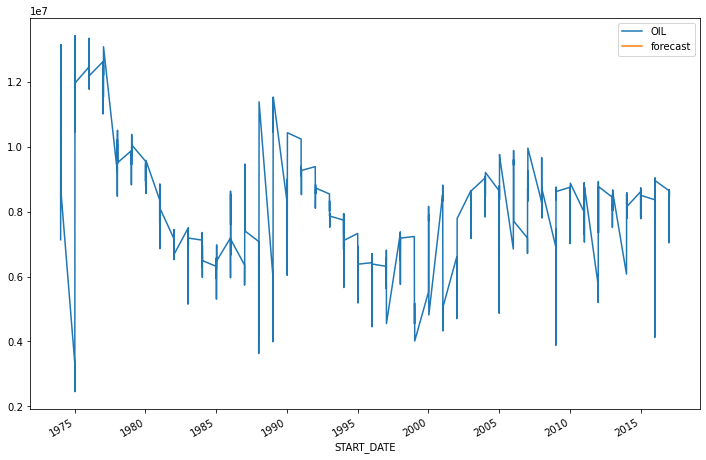

In [133]:
df['forecast']=results.predict(start=2010,end=2020)
df[['OIL','forecast']].plot(figsize=(12,8));

In [134]:
from pandas.tseries.offsets import DateOffset

In [135]:
df['forecast']=results.predict(start=2009,end=2020)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


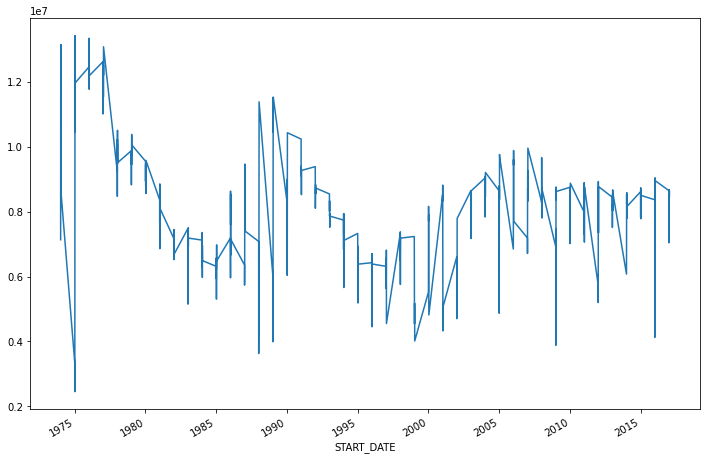

In [136]:
df['OIL'].plot(figsize=(12,8));
df['forecast'].plot(figsize=(12,8));